In [1]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *
from linares_plot import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [2]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_delay_traintarg_27.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_delay_traintarg_27.xlsx']

paths_distractor_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_delay_traintarg_27.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_delay_traintarg_27.xlsx']

In [3]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)

####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance    
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)

In [4]:
df = df_distractor
df['label']= df['item'] + ' ' + df['distance'] 
df['label'] = df['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-0.667250,visual,n001,2_7,df,dist,delay,far
1,2.335,-6.502361,visual,n001,2_7,df,dist,delay,far
2,4.670,-8.653672,visual,n001,2_7,df,dist,delay,far
3,7.005,-5.798663,visual,n001,2_7,df,dist,delay,far
4,9.340,-4.713440,visual,n001,2_7,df,dist,delay,far


In [5]:
df_shuff = df_distractor_shuff
df_shuff['label']= df_shuff['item'] + ' ' + df_shuff['distance'] 
df_shuff['label'] = df_shuff['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-1.267531,visual,d001,2_7,df,dist,delay,far
1,2.335,-0.793321,visual,d001,2_7,df,dist,delay,far
2,4.670,0.114856,visual,d001,2_7,df,dist,delay,far
3,7.005,1.112963,visual,d001,2_7,df,dist,delay,far
4,9.340,1.679971,visual,d001,2_7,df,dist,delay,far


In [6]:
df_delay=[]
for cond in ['2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close','far']: ##falta el close
                for trained in ['delay']:
                    for item in ['dist']:
                        ####
                        if cond =='2_7': ##just the TRs they are "alone"; in 1_ there is coexistance!
                            if item=='dist':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                            ####
                        ###
                    ###
                ##
            ##
        ##
    ##
##
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained', 'distance']


In [7]:
df_time=[]

for cond in ['2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close','far']: ##falta el close
                for trained in [ 'delay']:
                    for item in [ 'dist']:
                        for t in df.times.unique(): 
                            dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                                   ( df['condition']==cond) & (df['subject']==subj) &  
                                   ( df['distance']==dist) & (df['trained']==trained) & 
                                   ( df['item']==item)]
                            #
                            dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                                   ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                   ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                   ( df_shuff['item']==item)].decoding.mean()
                            #
                            decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff
                            df_time.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], item, trained, dist] )   
                            ####)
#
df_time = pd.DataFrame(df_time)
df_time.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'item', 'trained', 'distance']

Text(0.5,1,'decoding 2_7 distractor, trianed target')

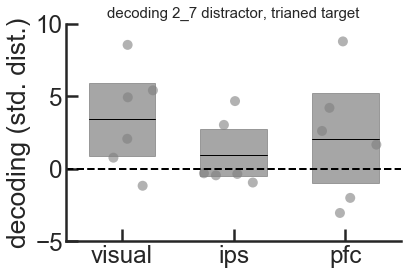

In [12]:
linares_plot(x='region', y='decoding_sh', order=['visual', 'ips', 'pfc'], 
            df=df_delay, 
            palette=['grey'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([-5,0,5, 10])
plt.title('decoding 2_7 distractor, trianed target', fontsize=15)

In [16]:
res_m = smf.mixedlm(formula='decoding_sh ~ region', 
                    data=df_delay.loc[df_delay['region']=='visual'],
                    groups=df_delay.loc[df_delay['region']=='visual' , 'subject']).fit()
print(res_m.summary())

res_m = smf.mixedlm(formula='decoding_sh ~ region', 
                    data=df_delay.loc[df_delay['region']=='ips'],
                    groups=df_delay.loc[df_delay['region']=='ips' , 'subject']).fit()
print(res_m.summary())

res_m = smf.mixedlm(formula='decoding_sh ~ region', 
                    data=df_delay.loc[df_delay['region']=='pfc'],
                    groups=df_delay.loc[df_delay['region']=='pfc' , 'subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_sh
No. Observations: 12      Method:             REML       
No. Groups:       6       Scale:              16.6777    
Min. group size:  2       Likelihood:         -33.3402   
Max. group size:  2       Converged:          Yes        
Mean group size:  2.0                                    
----------------------------------------------------------
             Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    3.428     1.443  2.375  0.018   0.599   6.257
Group Var    4.161     2.621                              

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_sh
No. Observations: 12      Method:             REML       
No. Groups:       6       Scale:              10.8216    
Min. group size:  2       Likelihood:         -29.9493   
Max. group size:  2       Co

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [13]:
presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active


def tiemcourse_4_conditions(df_plot, title_plot):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = ['darkblue',  'darkorange',  'darkgreen'] #sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(12,10))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 36]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -10 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 10 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[df_plot['condition']==condition ]
        sns.lineplot( ax=ax, x="times", y="decoding", hue='region', ci=68,
                     hue_order =  ['visual', 'ips', 'pfc'], palette=pal, data=data_cond)
        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response
        #
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.ylim(-20, 20)
        plt.yticks([-20, -10, 0 , 10, 20])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(frameon=False, bbox_to_anchor=(1.1, 1.05), fontsize=15)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( title_plot, fontsize=18) ## main title
    plt.tight_layout(w_pad=1, h_pad=1, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


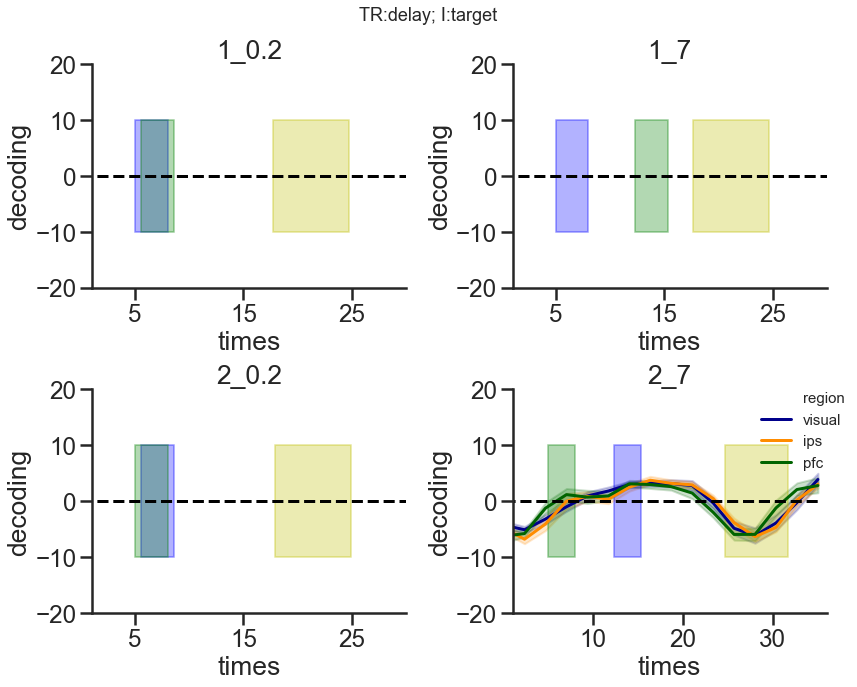

In [14]:
df_x = df_time
tiemcourse_4_conditions(df_x , 'TR:delay; I:target')